In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Merging the individual csv files for the years 1990 - 2022

In [16]:
import glob
import os

path = r'C:\Users\Jasim\Desktop\yield_curve_plot' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))


li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.DataFrame()
for f in all_files:
    csv = pd.read_csv(f)
    df = pd.concat([df, csv])

df

,Date,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,20 Yr,1 Mo,2 Mo,Unnamed: 0
0,12/31/1990,6.63,6.73,6.82,7.15,7.40,7.68,8.00,8.08,8.26,NaN,NaN,NaN,NaN
1,12/28/1990,6.64,6.85,6.91,7.25,7.48,7.78,8.08,8.14,8.31,NaN,NaN,NaN,NaN
2,12/27/1990,6.67,6.91,6.94,7.25,7.46,7.75,8.03,8.11,8.25,NaN,NaN,NaN,NaN
3,12/26/1990,6.68,6.91,6.94,7.27,7.50,7.78,8.07,8.15,8.30,NaN,NaN,NaN,NaN
4,12/24/1990,6.73,6.95,6.99,7.35,7.53,7.84,8.12,8.20,8.36,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16357,1/7/2022,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.11,2.15,0.05,0.05,8176.0
16358,1/6/2022,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.09,2.12,0.04,0.05,8177.0
16359,1/5/2022,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.09,2.12,0.05,0.06,8178.0
16360,1/4/2022,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.07,2.10,0.06,0.05,8179.0


### Save the combined csv file, convert the data column to python's datetime type and sort the values by date
#### The values are sorted by date because the individual yearly csv files are sorted from Dec to Jan and when they are all concatenated, the dates in the combined file is quite messy

In [17]:
#df.to_csv("allyears.csv")

In [18]:
df_cleaned = pd.read_csv("allyears.csv")
#df_cleaned = df.drop(columns=["Unnamed: 0"])
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])
df_cleaned.sort_values(by='Date', inplace=True)
df_cleaned = df_cleaned.reset_index(drop=True)
#f.to_csv("tallyears.csv")
df_cleaned

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1,1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
2,1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
3,1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
4,1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8175,2022-09-02,2.49,2.79,2.94,3.33,3.47,3.40,3.44,3.30,3.29,3.20,3.61,3.35
8176,2022-09-06,2.44,2.82,3.04,3.40,3.61,3.50,3.55,3.43,3.41,3.33,3.74,3.49
8177,2022-09-07,2.30,2.80,3.07,3.42,3.60,3.45,3.50,3.37,3.35,3.27,3.67,3.42
8178,2022-09-08,2.57,2.86,3.06,3.44,3.60,3.48,3.54,3.39,3.37,3.29,3.69,3.45


In [19]:
df_cleaned["Date"]

0      1990-01-02
1      1990-01-03
2      1990-01-04
3      1990-01-05
4      1990-01-08
          ...    
8175   2022-09-02
8176   2022-09-06
8177   2022-09-07
8178   2022-09-08
8179   2022-09-09
Name: Date, Length: 8180, dtype: datetime64[ns]

## Select a particular range of dates

In [20]:
#plot = df_cleaned.loc[df_cleaned["Date"]> "1992-12-25"]
#mask = (df_cleaned['Date'] > "1992-12-25")
#plot.describe()
plot = df_cleaned

In [21]:
plot

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1,1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
2,1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
3,1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
4,1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8175,2022-09-02,2.49,2.79,2.94,3.33,3.47,3.40,3.44,3.30,3.29,3.20,3.61,3.35
8176,2022-09-06,2.44,2.82,3.04,3.40,3.61,3.50,3.55,3.43,3.41,3.33,3.74,3.49
8177,2022-09-07,2.30,2.80,3.07,3.42,3.60,3.45,3.50,3.37,3.35,3.27,3.67,3.42
8178,2022-09-08,2.57,2.86,3.06,3.44,3.60,3.48,3.54,3.39,3.37,3.29,3.69,3.45


## Plot a particular date

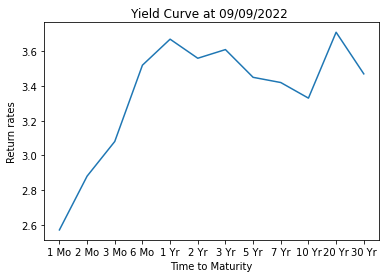

In [22]:
date = "09/09/2022"
x_points = plot.columns.values.tolist()[1:]
y_points = plot.loc[plot["Date"]==date].values[0][1:].tolist()

plt.ylabel("Return rates")
plt.xlabel("Time to Maturity")
plt.title(f"Yield Curve at %s " % (date))
plt.plot(x_points, y_points)
plt.show()

In [23]:
dates = list(plot["Date"])
dates[0]
plot["Date"].is_unique

True

## Plotting out an animation of the yield curve across time

In [24]:
from matplotlib.animation import PillowWriter
metadata = dict(title='Movie', artist='codinglikemad')
writer = PillowWriter(fps=15, metadata=metadata)

In [25]:
len(plot["Date"])

8180

In [26]:
#https://matplotlib.org/stable/gallery/animation/simple_anim.html

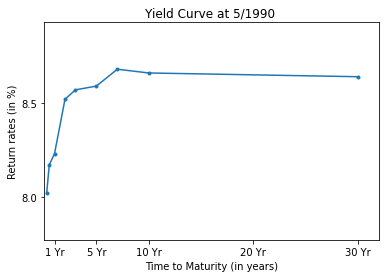

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.lines as lines
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as plticker

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

global count
count = -1

def func():
    global count
    count += 1
    #print(count)
    plt.title(f"Yield Curve at %s " % (str(dates[count].month) + "/" + str(dates[count].year)))
    return plot.loc[plot["Date"]==dates[count]].values[0][1:].tolist()
    
def animate(i):
    y_dat = np.array(func())
    mask = np.isfinite(y_dat)
    x_dat = np.array([0.08, 0.016, 0.25, 0.5, 1, 2, 3, 5, 7, 10, 20, 30]) #Slowing step FIX

    y_lim_list = [y for y in y_dat if str(y) != 'nan']
    plt.ylim([min(y_lim_list)-0.25, max(y_lim_list)+0.25])

    #ffill() is to resolve the issue with having NaN values
    line.set_marker(".")
    line.set_ydata(y_dat[mask])  # update the data.
    line.set_xdata(x_dat[mask])
    #print(line.get_data())
    #print(y_dat)
    return line,

#Interval is how fast each frame is displayed in ms (if interval = 15, show each frame for 15 seconds)
#save_count is the number of days you want to plot out
ani = animation.FuncAnimation(
    fig, animate, interval=30, blit=True, save_count=100)

plt.ylim([0, 10])
plt.xlim([0, 32])
plt.ylabel("Return rates (in %)")
plt.xlabel("Time to Maturity (in years)")
plt.margins(x=0.02)
ax.set_xticks([1, 5, 10, 20, 30])
ax.set_xticklabels(["1 Yr", "5 Yr", "10 Yr", "20 Yr","30 Yr"])  
fig.patch.set_facecolor('xkcd:white')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
loc = plticker.MultipleLocator(base=0.5)
ax.yaxis.set_major_locator(loc)
#ax.text(8, 8, 'boxed italics text in data coords', style='italic',
#        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})


# To save the animation, use e.g.
#
#ani.save("lines.gif")
#
# or
#
writer = animation.FFMpegWriter(
    fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("a.mp4", writer=writer)

plt.show()

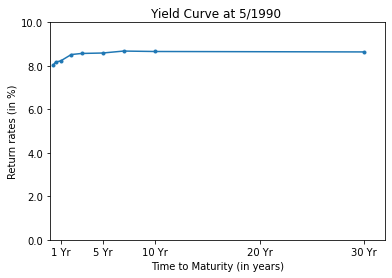

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.lines as lines
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as plticker

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

global count
count = -1

def func():
    global count
    count += 1
    #print(count)
    plt.title(f"Yield Curve at %s " % (str(dates[count].month) + "/" + str(dates[count].year)))
    return plot.loc[plot["Date"]==dates[count]].values[0][1:].tolist()
    
def animate(i):
    y_dat = np.array(func())
    mask = np.isfinite(y_dat)
    x_dat = np.array([0.08, 0.016, 0.25, 0.5, 1, 2, 3, 5, 7, 10, 20, 30]) #Slowing step FIX

    y_lim_list = [y for y in y_dat if str(y) != 'nan']
    #plt.ylim([min(y_lim_list)-0.25, max(y_lim_list)+0.25])

    #ffill() is to resolve the issue with having NaN values
    line.set_marker(".")
    line.set_ydata(y_dat[mask])  # update the data.
    line.set_xdata(x_dat[mask])
    #print(line.get_data())
    #print(y_dat)
    return line,

#Interval is how fast each frame is displayed in ms (if interval = 15, show each frame for 15 seconds)
#save_count is the number of days you want to plot out
ani = animation.FuncAnimation(
    fig, animate, interval=30, blit=True, save_count=100)

plt.ylim([0, 10])
plt.xlim([0, 32])
plt.ylabel("Return rates (in %)")
plt.xlabel("Time to Maturity (in years)")
plt.margins(x=0.02)
ax.set_xticks([1, 5, 10, 20, 30])
ax.set_xticklabels(["1 Yr", "5 Yr", "10 Yr", "20 Yr","30 Yr"])  
fig.patch.set_facecolor('xkcd:white')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
loc = plticker.MultipleLocator(base=2)
ax.yaxis.set_major_locator(loc)
#ax.text(8, 8, 'boxed italics text in data coords', style='italic',
#        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})


# To save the animation, use e.g.
#
#ani.save("lines.gif")
#
# or
#
writer = animation.FFMpegWriter(
    fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save("y.mp4", writer=writer)

plt.show()

## I was playing around with the animation feature in matplotlib

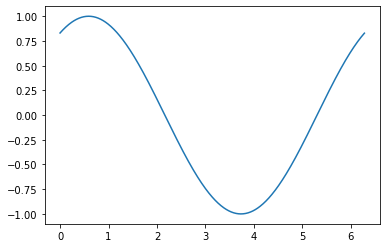

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
ani.save("movie.gif")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()